In [4]:
%%capture
!pip install meteostat datetime

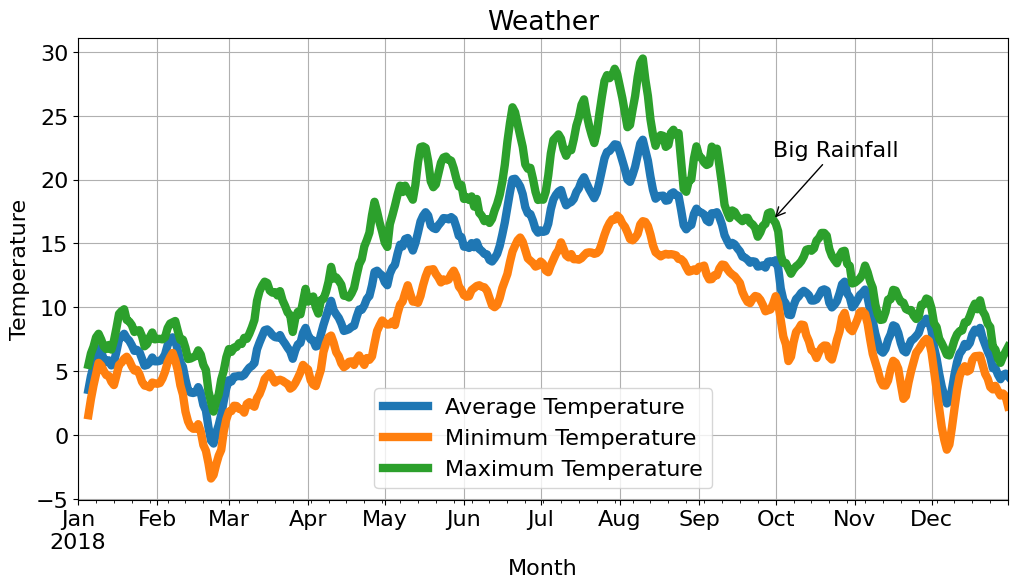

In [13]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

def foo(x, y):
    x['Average Temperature'] = x['Average Temperature'].rolling(window=y).mean()
    x['Minimum Temperature'] = x['Minimum Temperature'].rolling(window=y).mean()
    x['Maximum Temperature'] = x['Maximum Temperature'].rolling(window=y).mean()
    return x

def bar(ax, events):
    for date, label in events.items():
        ax.annotate(label, xy=(date, data.loc[date, 'Maximum Temperature']),
                    xytext=(date, data.loc[date, 'Maximum Temperature'] + 5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

location = Point(49.2497, -123.1193, 70)

data = Daily(location, start, end)
data = data.fetch()

data = data.rename(columns={
    'tavg': 'Average Temperature',
    'tmin': 'Minimum Temperature',
    'tmax': 'Maximum Temperature'
})

data = foo(data, 5)

significant_events = {
    datetime(2018, 9, 30): 'Big Rainfall',
}

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,6))

data.plot(ax=ax,
          y=['Average Temperature', 'Minimum Temperature', 'Maximum Temperature'],
          linewidth=6,
         )

bar(ax, significant_events)

plt.title('Weather')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()
plt.show()